<h1>using tutorial <a href="https://machinelearningmastery.com/how-to-interpolate-and-perform-vector-arithmetic-with-faces-using-a-generative-adversarial-network/">here</a>:</h1>

In [1]:
import os
from numpy import asarray
from numpy import savez_compressed
from PIL import Image
from matplotlib import pyplot

#import mtcnn is working, this is a handy repo for face detection
from mtcnn.mtcnn import MTCNN

Using TensorFlow backend.


In [2]:
#function to import an image as RGB numpy array
def load_image(filename):
    #load from file
    image = Image.open(filename)
    #convert to RGB
    image = image.convert('RGB')
    #store as array
    pixels = asarray(image)
    #line below can be used to examine array size and factors
    #print(pixels.shape)
    #return array
    return pixels
    #close opened file (not necessary but seems good)
    image.close()

In [3]:
#function to load and store multiple image pixel arrays,
#extract and resize facial pixel arrays via MTCNN, and then store
#in a higher order array
def load_faces(directory, n_faces):
    #define the list, to become the array^2
    faces = list()
    #invoke MTCNN model to do facial detection
    model = MTCNN()
    
    for filename in os.listdir(directory):
        #get single image pixel array from above
        pixels = load_image(directory + filename)
        #detect, resize, and extract facial pixel array
        face = extract_face(model, pixels)
        #no-face image handling (see likewise if: in extract_face)
        if face is None:
            continue
        #store individual resized facial pixel array
        faces.append(face)
        print(len(faces), face.shape)
        #stop once we have enough
        if len(faces) >= n_faces:
            break
    #last step converts the list into the array^2
    return asarray(faces)

In [4]:
#function to display list of loaded images
def plot_faces(faces, n):
    for i in range(n * n):
        #define a subplot
        pyplot.subplot(n, n, i + 1)
        #turn off axes
        pyplot.axis('off')
        #plot raw pixel data
        pyplot.imshow(faces[i])
    pyplot.show()

In [5]:
#inputting data

#dataset directory
directory = 'celebA\\'

In [8]:
#actually load the images
faces = load_faces(directory, 1)
#print debugging check on loaded array^2
print('loaded: ', faces.shape)

1 (80, 80, 3)
loaded:  (1, 80, 80, 3)


IndexError: index 1 is out of bounds for axis 0 with size 1

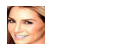

In [9]:
#let's see the plot!
plot_faces(faces, 5)

In [10]:
#function to display single borderless face (practice for render)
def render_face(faces):
    Image.fromarray(faces[0], 'RGB').save('test_single2.png')

In [11]:
render_face(faces)

<em>(from tutorial)<br>
First, an instance of the MTCNN model is created, then the detect_faces() function can be called passing in the pixel data for one image. The result is a list of detected faces, with a bounding box defined in pixel offset values.</em>

#example mtcnn face detection baseline script

#define model as mtcnn base object
model = MTCNN()
#detect faces in the image
faces = model.detect_faces(pixels)
#return the details of the detected facial pixels
x1, y1, width, height = faces[0]['box']

In [7]:
#finally, the last function we need formalizes the above
def extract_face(model, pixels, required_size=(80,80)):
    #detect faces in the image
    faces = model.detect_faces(pixels)
    #skip cases with no face found
    if len(faces) == 0:
        return None
    #extract details of detected facial pixels; note faces[0] means
    #this will only extract the FIRST FACE DETECTED
    #(with a clean dataset such as celebA this doesn't matter..)
    x1, y1, width, height = faces[0]['box']
    #force detected pixel values to be positive (bug fix per tutorial)
    x1, y1 = abs(x1), abs(y1)
    
    #convert into original image coordinates
    x2, y2 = x1 + width, y1 + height
    #retrieve facial pixels themselves
    face_pixels = pixels[y1:y2, x1:x2]
    #resize pixels to target (GAN model) size
    image = Image.fromarray(face_pixels)
    image = image.resize(required_size)
    face_array = asarray(image)
    #note this function parses ONE pixel array and returns
    #a single, face-detected, resized pixel array
    return face_array

<h2>LAST STEP IS TO EXPORT A THUS-CLEANED DATASET WITH A SIZE OF YOUR CHOOSING!

In [10]:
faces_dataset = load_faces(directory, 10000)
print('loaded: ', faces_dataset.shape)

#save in compressed format
savez_compressed('align-80px_celebA_10000set.npz', faces_dataset)

1 (80, 80, 3)
2 (80, 80, 3)
3 (80, 80, 3)
4 (80, 80, 3)
5 (80, 80, 3)
6 (80, 80, 3)
7 (80, 80, 3)
8 (80, 80, 3)
9 (80, 80, 3)
10 (80, 80, 3)
11 (80, 80, 3)
12 (80, 80, 3)
13 (80, 80, 3)
14 (80, 80, 3)
15 (80, 80, 3)
16 (80, 80, 3)
17 (80, 80, 3)
18 (80, 80, 3)
19 (80, 80, 3)
20 (80, 80, 3)
21 (80, 80, 3)
22 (80, 80, 3)
23 (80, 80, 3)
24 (80, 80, 3)
25 (80, 80, 3)
26 (80, 80, 3)
27 (80, 80, 3)
28 (80, 80, 3)
29 (80, 80, 3)
30 (80, 80, 3)
31 (80, 80, 3)
32 (80, 80, 3)
33 (80, 80, 3)
34 (80, 80, 3)
35 (80, 80, 3)
36 (80, 80, 3)
37 (80, 80, 3)
38 (80, 80, 3)
39 (80, 80, 3)
40 (80, 80, 3)
41 (80, 80, 3)
42 (80, 80, 3)
43 (80, 80, 3)
44 (80, 80, 3)
45 (80, 80, 3)
46 (80, 80, 3)
47 (80, 80, 3)
48 (80, 80, 3)
49 (80, 80, 3)
50 (80, 80, 3)
51 (80, 80, 3)
52 (80, 80, 3)
53 (80, 80, 3)
54 (80, 80, 3)
55 (80, 80, 3)
56 (80, 80, 3)
57 (80, 80, 3)
58 (80, 80, 3)
59 (80, 80, 3)
60 (80, 80, 3)
61 (80, 80, 3)
62 (80, 80, 3)
63 (80, 80, 3)
64 (80, 80, 3)
65 (80, 80, 3)
66 (80, 80, 3)
67 (80, 80, 3)
68 (

520 (80, 80, 3)
521 (80, 80, 3)
522 (80, 80, 3)
523 (80, 80, 3)
524 (80, 80, 3)
525 (80, 80, 3)
526 (80, 80, 3)
527 (80, 80, 3)
528 (80, 80, 3)
529 (80, 80, 3)
530 (80, 80, 3)
531 (80, 80, 3)
532 (80, 80, 3)
533 (80, 80, 3)
534 (80, 80, 3)
535 (80, 80, 3)
536 (80, 80, 3)
537 (80, 80, 3)
538 (80, 80, 3)
539 (80, 80, 3)
540 (80, 80, 3)
541 (80, 80, 3)
542 (80, 80, 3)
543 (80, 80, 3)
544 (80, 80, 3)
545 (80, 80, 3)
546 (80, 80, 3)
547 (80, 80, 3)
548 (80, 80, 3)
549 (80, 80, 3)
550 (80, 80, 3)
551 (80, 80, 3)
552 (80, 80, 3)
553 (80, 80, 3)
554 (80, 80, 3)
555 (80, 80, 3)
556 (80, 80, 3)
557 (80, 80, 3)
558 (80, 80, 3)
559 (80, 80, 3)
560 (80, 80, 3)
561 (80, 80, 3)
562 (80, 80, 3)
563 (80, 80, 3)
564 (80, 80, 3)
565 (80, 80, 3)
566 (80, 80, 3)
567 (80, 80, 3)
568 (80, 80, 3)
569 (80, 80, 3)
570 (80, 80, 3)
571 (80, 80, 3)
572 (80, 80, 3)
573 (80, 80, 3)
574 (80, 80, 3)
575 (80, 80, 3)
576 (80, 80, 3)
577 (80, 80, 3)
578 (80, 80, 3)
579 (80, 80, 3)
580 (80, 80, 3)
581 (80, 80, 3)
582 (80,

1033 (80, 80, 3)
1034 (80, 80, 3)
1035 (80, 80, 3)
1036 (80, 80, 3)
1037 (80, 80, 3)
1038 (80, 80, 3)
1039 (80, 80, 3)
1040 (80, 80, 3)
1041 (80, 80, 3)
1042 (80, 80, 3)
1043 (80, 80, 3)
1044 (80, 80, 3)
1045 (80, 80, 3)
1046 (80, 80, 3)
1047 (80, 80, 3)
1048 (80, 80, 3)
1049 (80, 80, 3)
1050 (80, 80, 3)
1051 (80, 80, 3)
1052 (80, 80, 3)
1053 (80, 80, 3)
1054 (80, 80, 3)
1055 (80, 80, 3)
1056 (80, 80, 3)
1057 (80, 80, 3)
1058 (80, 80, 3)
1059 (80, 80, 3)
1060 (80, 80, 3)
1061 (80, 80, 3)
1062 (80, 80, 3)
1063 (80, 80, 3)
1064 (80, 80, 3)
1065 (80, 80, 3)
1066 (80, 80, 3)
1067 (80, 80, 3)
1068 (80, 80, 3)
1069 (80, 80, 3)
1070 (80, 80, 3)
1071 (80, 80, 3)
1072 (80, 80, 3)
1073 (80, 80, 3)
1074 (80, 80, 3)
1075 (80, 80, 3)
1076 (80, 80, 3)
1077 (80, 80, 3)
1078 (80, 80, 3)
1079 (80, 80, 3)
1080 (80, 80, 3)
1081 (80, 80, 3)
1082 (80, 80, 3)
1083 (80, 80, 3)
1084 (80, 80, 3)
1085 (80, 80, 3)
1086 (80, 80, 3)
1087 (80, 80, 3)
1088 (80, 80, 3)
1089 (80, 80, 3)
1090 (80, 80, 3)
1091 (80, 80, 

1520 (80, 80, 3)
1521 (80, 80, 3)
1522 (80, 80, 3)
1523 (80, 80, 3)
1524 (80, 80, 3)
1525 (80, 80, 3)
1526 (80, 80, 3)
1527 (80, 80, 3)
1528 (80, 80, 3)
1529 (80, 80, 3)
1530 (80, 80, 3)
1531 (80, 80, 3)
1532 (80, 80, 3)
1533 (80, 80, 3)
1534 (80, 80, 3)
1535 (80, 80, 3)
1536 (80, 80, 3)
1537 (80, 80, 3)
1538 (80, 80, 3)
1539 (80, 80, 3)
1540 (80, 80, 3)
1541 (80, 80, 3)
1542 (80, 80, 3)
1543 (80, 80, 3)
1544 (80, 80, 3)
1545 (80, 80, 3)
1546 (80, 80, 3)
1547 (80, 80, 3)
1548 (80, 80, 3)
1549 (80, 80, 3)
1550 (80, 80, 3)
1551 (80, 80, 3)
1552 (80, 80, 3)
1553 (80, 80, 3)
1554 (80, 80, 3)
1555 (80, 80, 3)
1556 (80, 80, 3)
1557 (80, 80, 3)
1558 (80, 80, 3)
1559 (80, 80, 3)
1560 (80, 80, 3)
1561 (80, 80, 3)
1562 (80, 80, 3)
1563 (80, 80, 3)
1564 (80, 80, 3)
1565 (80, 80, 3)
1566 (80, 80, 3)
1567 (80, 80, 3)
1568 (80, 80, 3)
1569 (80, 80, 3)
1570 (80, 80, 3)
1571 (80, 80, 3)
1572 (80, 80, 3)
1573 (80, 80, 3)
1574 (80, 80, 3)
1575 (80, 80, 3)
1576 (80, 80, 3)
1577 (80, 80, 3)
1578 (80, 80, 

2005 (80, 80, 3)
2006 (80, 80, 3)
2007 (80, 80, 3)
2008 (80, 80, 3)
2009 (80, 80, 3)
2010 (80, 80, 3)
2011 (80, 80, 3)
2012 (80, 80, 3)
2013 (80, 80, 3)
2014 (80, 80, 3)
2015 (80, 80, 3)
2016 (80, 80, 3)
2017 (80, 80, 3)
2018 (80, 80, 3)
2019 (80, 80, 3)
2020 (80, 80, 3)
2021 (80, 80, 3)
2022 (80, 80, 3)
2023 (80, 80, 3)
2024 (80, 80, 3)
2025 (80, 80, 3)
2026 (80, 80, 3)
2027 (80, 80, 3)
2028 (80, 80, 3)
2029 (80, 80, 3)
2030 (80, 80, 3)
2031 (80, 80, 3)
2032 (80, 80, 3)
2033 (80, 80, 3)
2034 (80, 80, 3)
2035 (80, 80, 3)
2036 (80, 80, 3)
2037 (80, 80, 3)
2038 (80, 80, 3)
2039 (80, 80, 3)
2040 (80, 80, 3)
2041 (80, 80, 3)
2042 (80, 80, 3)
2043 (80, 80, 3)
2044 (80, 80, 3)
2045 (80, 80, 3)
2046 (80, 80, 3)
2047 (80, 80, 3)
2048 (80, 80, 3)
2049 (80, 80, 3)
2050 (80, 80, 3)
2051 (80, 80, 3)
2052 (80, 80, 3)
2053 (80, 80, 3)
2054 (80, 80, 3)
2055 (80, 80, 3)
2056 (80, 80, 3)
2057 (80, 80, 3)
2058 (80, 80, 3)
2059 (80, 80, 3)
2060 (80, 80, 3)
2061 (80, 80, 3)
2062 (80, 80, 3)
2063 (80, 80, 

2491 (80, 80, 3)
2492 (80, 80, 3)
2493 (80, 80, 3)
2494 (80, 80, 3)
2495 (80, 80, 3)
2496 (80, 80, 3)
2497 (80, 80, 3)
2498 (80, 80, 3)
2499 (80, 80, 3)
2500 (80, 80, 3)
2501 (80, 80, 3)
2502 (80, 80, 3)
2503 (80, 80, 3)
2504 (80, 80, 3)
2505 (80, 80, 3)
2506 (80, 80, 3)
2507 (80, 80, 3)
2508 (80, 80, 3)
2509 (80, 80, 3)
2510 (80, 80, 3)
2511 (80, 80, 3)
2512 (80, 80, 3)
2513 (80, 80, 3)
2514 (80, 80, 3)
2515 (80, 80, 3)
2516 (80, 80, 3)
2517 (80, 80, 3)
2518 (80, 80, 3)
2519 (80, 80, 3)
2520 (80, 80, 3)
2521 (80, 80, 3)
2522 (80, 80, 3)
2523 (80, 80, 3)
2524 (80, 80, 3)
2525 (80, 80, 3)
2526 (80, 80, 3)
2527 (80, 80, 3)
2528 (80, 80, 3)
2529 (80, 80, 3)
2530 (80, 80, 3)
2531 (80, 80, 3)
2532 (80, 80, 3)
2533 (80, 80, 3)
2534 (80, 80, 3)
2535 (80, 80, 3)
2536 (80, 80, 3)
2537 (80, 80, 3)
2538 (80, 80, 3)
2539 (80, 80, 3)
2540 (80, 80, 3)
2541 (80, 80, 3)
2542 (80, 80, 3)
2543 (80, 80, 3)
2544 (80, 80, 3)
2545 (80, 80, 3)
2546 (80, 80, 3)
2547 (80, 80, 3)
2548 (80, 80, 3)
2549 (80, 80, 

2978 (80, 80, 3)
2979 (80, 80, 3)
2980 (80, 80, 3)
2981 (80, 80, 3)
2982 (80, 80, 3)
2983 (80, 80, 3)
2984 (80, 80, 3)
2985 (80, 80, 3)
2986 (80, 80, 3)
2987 (80, 80, 3)
2988 (80, 80, 3)
2989 (80, 80, 3)
2990 (80, 80, 3)
2991 (80, 80, 3)
2992 (80, 80, 3)
2993 (80, 80, 3)
2994 (80, 80, 3)
2995 (80, 80, 3)
2996 (80, 80, 3)
2997 (80, 80, 3)
2998 (80, 80, 3)
2999 (80, 80, 3)
3000 (80, 80, 3)
3001 (80, 80, 3)
3002 (80, 80, 3)
3003 (80, 80, 3)
3004 (80, 80, 3)
3005 (80, 80, 3)
3006 (80, 80, 3)
3007 (80, 80, 3)
3008 (80, 80, 3)
3009 (80, 80, 3)
3010 (80, 80, 3)
3011 (80, 80, 3)
3012 (80, 80, 3)
3013 (80, 80, 3)
3014 (80, 80, 3)
3015 (80, 80, 3)
3016 (80, 80, 3)
3017 (80, 80, 3)
3018 (80, 80, 3)
3019 (80, 80, 3)
3020 (80, 80, 3)
3021 (80, 80, 3)
3022 (80, 80, 3)
3023 (80, 80, 3)
3024 (80, 80, 3)
3025 (80, 80, 3)
3026 (80, 80, 3)
3027 (80, 80, 3)
3028 (80, 80, 3)
3029 (80, 80, 3)
3030 (80, 80, 3)
3031 (80, 80, 3)
3032 (80, 80, 3)
3033 (80, 80, 3)
3034 (80, 80, 3)
3035 (80, 80, 3)
3036 (80, 80, 

3464 (80, 80, 3)
3465 (80, 80, 3)
3466 (80, 80, 3)
3467 (80, 80, 3)
3468 (80, 80, 3)
3469 (80, 80, 3)
3470 (80, 80, 3)
3471 (80, 80, 3)
3472 (80, 80, 3)
3473 (80, 80, 3)
3474 (80, 80, 3)
3475 (80, 80, 3)
3476 (80, 80, 3)
3477 (80, 80, 3)
3478 (80, 80, 3)
3479 (80, 80, 3)
3480 (80, 80, 3)
3481 (80, 80, 3)
3482 (80, 80, 3)
3483 (80, 80, 3)
3484 (80, 80, 3)
3485 (80, 80, 3)
3486 (80, 80, 3)
3487 (80, 80, 3)
3488 (80, 80, 3)
3489 (80, 80, 3)
3490 (80, 80, 3)
3491 (80, 80, 3)
3492 (80, 80, 3)
3493 (80, 80, 3)
3494 (80, 80, 3)
3495 (80, 80, 3)
3496 (80, 80, 3)
3497 (80, 80, 3)
3498 (80, 80, 3)
3499 (80, 80, 3)
3500 (80, 80, 3)
3501 (80, 80, 3)
3502 (80, 80, 3)
3503 (80, 80, 3)
3504 (80, 80, 3)
3505 (80, 80, 3)
3506 (80, 80, 3)
3507 (80, 80, 3)
3508 (80, 80, 3)
3509 (80, 80, 3)
3510 (80, 80, 3)
3511 (80, 80, 3)
3512 (80, 80, 3)
3513 (80, 80, 3)
3514 (80, 80, 3)
3515 (80, 80, 3)
3516 (80, 80, 3)
3517 (80, 80, 3)
3518 (80, 80, 3)
3519 (80, 80, 3)
3520 (80, 80, 3)
3521 (80, 80, 3)
3522 (80, 80, 

3946 (80, 80, 3)
3947 (80, 80, 3)
3948 (80, 80, 3)
3949 (80, 80, 3)
3950 (80, 80, 3)
3951 (80, 80, 3)
3952 (80, 80, 3)
3953 (80, 80, 3)
3954 (80, 80, 3)
3955 (80, 80, 3)
3956 (80, 80, 3)
3957 (80, 80, 3)
3958 (80, 80, 3)
3959 (80, 80, 3)
3960 (80, 80, 3)
3961 (80, 80, 3)
3962 (80, 80, 3)
3963 (80, 80, 3)
3964 (80, 80, 3)
3965 (80, 80, 3)
3966 (80, 80, 3)
3967 (80, 80, 3)
3968 (80, 80, 3)
3969 (80, 80, 3)
3970 (80, 80, 3)
3971 (80, 80, 3)
3972 (80, 80, 3)
3973 (80, 80, 3)
3974 (80, 80, 3)
3975 (80, 80, 3)
3976 (80, 80, 3)
3977 (80, 80, 3)
3978 (80, 80, 3)
3979 (80, 80, 3)
3980 (80, 80, 3)
3981 (80, 80, 3)
3982 (80, 80, 3)
3983 (80, 80, 3)
3984 (80, 80, 3)
3985 (80, 80, 3)
3986 (80, 80, 3)
3987 (80, 80, 3)
3988 (80, 80, 3)
3989 (80, 80, 3)
3990 (80, 80, 3)
3991 (80, 80, 3)
3992 (80, 80, 3)
3993 (80, 80, 3)
3994 (80, 80, 3)
3995 (80, 80, 3)
3996 (80, 80, 3)
3997 (80, 80, 3)
3998 (80, 80, 3)
3999 (80, 80, 3)
4000 (80, 80, 3)
4001 (80, 80, 3)
4002 (80, 80, 3)
4003 (80, 80, 3)
4004 (80, 80, 

4430 (80, 80, 3)
4431 (80, 80, 3)
4432 (80, 80, 3)
4433 (80, 80, 3)
4434 (80, 80, 3)
4435 (80, 80, 3)
4436 (80, 80, 3)
4437 (80, 80, 3)
4438 (80, 80, 3)
4439 (80, 80, 3)
4440 (80, 80, 3)
4441 (80, 80, 3)
4442 (80, 80, 3)
4443 (80, 80, 3)
4444 (80, 80, 3)
4445 (80, 80, 3)
4446 (80, 80, 3)
4447 (80, 80, 3)
4448 (80, 80, 3)
4449 (80, 80, 3)
4450 (80, 80, 3)
4451 (80, 80, 3)
4452 (80, 80, 3)
4453 (80, 80, 3)
4454 (80, 80, 3)
4455 (80, 80, 3)
4456 (80, 80, 3)
4457 (80, 80, 3)
4458 (80, 80, 3)
4459 (80, 80, 3)
4460 (80, 80, 3)
4461 (80, 80, 3)
4462 (80, 80, 3)
4463 (80, 80, 3)
4464 (80, 80, 3)
4465 (80, 80, 3)
4466 (80, 80, 3)
4467 (80, 80, 3)
4468 (80, 80, 3)
4469 (80, 80, 3)
4470 (80, 80, 3)
4471 (80, 80, 3)
4472 (80, 80, 3)
4473 (80, 80, 3)
4474 (80, 80, 3)
4475 (80, 80, 3)
4476 (80, 80, 3)
4477 (80, 80, 3)
4478 (80, 80, 3)
4479 (80, 80, 3)
4480 (80, 80, 3)
4481 (80, 80, 3)
4482 (80, 80, 3)
4483 (80, 80, 3)
4484 (80, 80, 3)
4485 (80, 80, 3)
4486 (80, 80, 3)
4487 (80, 80, 3)
4488 (80, 80, 

4914 (80, 80, 3)
4915 (80, 80, 3)
4916 (80, 80, 3)
4917 (80, 80, 3)
4918 (80, 80, 3)
4919 (80, 80, 3)
4920 (80, 80, 3)
4921 (80, 80, 3)
4922 (80, 80, 3)
4923 (80, 80, 3)
4924 (80, 80, 3)
4925 (80, 80, 3)
4926 (80, 80, 3)
4927 (80, 80, 3)
4928 (80, 80, 3)
4929 (80, 80, 3)
4930 (80, 80, 3)
4931 (80, 80, 3)
4932 (80, 80, 3)
4933 (80, 80, 3)
4934 (80, 80, 3)
4935 (80, 80, 3)
4936 (80, 80, 3)
4937 (80, 80, 3)
4938 (80, 80, 3)
4939 (80, 80, 3)
4940 (80, 80, 3)
4941 (80, 80, 3)
4942 (80, 80, 3)
4943 (80, 80, 3)
4944 (80, 80, 3)
4945 (80, 80, 3)
4946 (80, 80, 3)
4947 (80, 80, 3)
4948 (80, 80, 3)
4949 (80, 80, 3)
4950 (80, 80, 3)
4951 (80, 80, 3)
4952 (80, 80, 3)
4953 (80, 80, 3)
4954 (80, 80, 3)
4955 (80, 80, 3)
4956 (80, 80, 3)
4957 (80, 80, 3)
4958 (80, 80, 3)
4959 (80, 80, 3)
4960 (80, 80, 3)
4961 (80, 80, 3)
4962 (80, 80, 3)
4963 (80, 80, 3)
4964 (80, 80, 3)
4965 (80, 80, 3)
4966 (80, 80, 3)
4967 (80, 80, 3)
4968 (80, 80, 3)
4969 (80, 80, 3)
4970 (80, 80, 3)
4971 (80, 80, 3)
4972 (80, 80, 

5399 (80, 80, 3)
5400 (80, 80, 3)
5401 (80, 80, 3)
5402 (80, 80, 3)
5403 (80, 80, 3)
5404 (80, 80, 3)
5405 (80, 80, 3)
5406 (80, 80, 3)
5407 (80, 80, 3)
5408 (80, 80, 3)
5409 (80, 80, 3)
5410 (80, 80, 3)
5411 (80, 80, 3)
5412 (80, 80, 3)
5413 (80, 80, 3)
5414 (80, 80, 3)
5415 (80, 80, 3)
5416 (80, 80, 3)
5417 (80, 80, 3)
5418 (80, 80, 3)
5419 (80, 80, 3)
5420 (80, 80, 3)
5421 (80, 80, 3)
5422 (80, 80, 3)
5423 (80, 80, 3)
5424 (80, 80, 3)
5425 (80, 80, 3)
5426 (80, 80, 3)
5427 (80, 80, 3)
5428 (80, 80, 3)
5429 (80, 80, 3)
5430 (80, 80, 3)
5431 (80, 80, 3)
5432 (80, 80, 3)
5433 (80, 80, 3)
5434 (80, 80, 3)
5435 (80, 80, 3)
5436 (80, 80, 3)
5437 (80, 80, 3)
5438 (80, 80, 3)
5439 (80, 80, 3)
5440 (80, 80, 3)
5441 (80, 80, 3)
5442 (80, 80, 3)
5443 (80, 80, 3)
5444 (80, 80, 3)
5445 (80, 80, 3)
5446 (80, 80, 3)
5447 (80, 80, 3)
5448 (80, 80, 3)
5449 (80, 80, 3)
5450 (80, 80, 3)
5451 (80, 80, 3)
5452 (80, 80, 3)
5453 (80, 80, 3)
5454 (80, 80, 3)
5455 (80, 80, 3)
5456 (80, 80, 3)
5457 (80, 80, 

5883 (80, 80, 3)
5884 (80, 80, 3)
5885 (80, 80, 3)
5886 (80, 80, 3)
5887 (80, 80, 3)
5888 (80, 80, 3)
5889 (80, 80, 3)
5890 (80, 80, 3)
5891 (80, 80, 3)
5892 (80, 80, 3)
5893 (80, 80, 3)
5894 (80, 80, 3)
5895 (80, 80, 3)
5896 (80, 80, 3)
5897 (80, 80, 3)
5898 (80, 80, 3)
5899 (80, 80, 3)
5900 (80, 80, 3)
5901 (80, 80, 3)
5902 (80, 80, 3)
5903 (80, 80, 3)
5904 (80, 80, 3)
5905 (80, 80, 3)
5906 (80, 80, 3)
5907 (80, 80, 3)
5908 (80, 80, 3)
5909 (80, 80, 3)
5910 (80, 80, 3)
5911 (80, 80, 3)
5912 (80, 80, 3)
5913 (80, 80, 3)
5914 (80, 80, 3)
5915 (80, 80, 3)
5916 (80, 80, 3)
5917 (80, 80, 3)
5918 (80, 80, 3)
5919 (80, 80, 3)
5920 (80, 80, 3)
5921 (80, 80, 3)
5922 (80, 80, 3)
5923 (80, 80, 3)
5924 (80, 80, 3)
5925 (80, 80, 3)
5926 (80, 80, 3)
5927 (80, 80, 3)
5928 (80, 80, 3)
5929 (80, 80, 3)
5930 (80, 80, 3)
5931 (80, 80, 3)
5932 (80, 80, 3)
5933 (80, 80, 3)
5934 (80, 80, 3)
5935 (80, 80, 3)
5936 (80, 80, 3)
5937 (80, 80, 3)
5938 (80, 80, 3)
5939 (80, 80, 3)
5940 (80, 80, 3)
5941 (80, 80, 

6371 (80, 80, 3)
6372 (80, 80, 3)
6373 (80, 80, 3)
6374 (80, 80, 3)
6375 (80, 80, 3)
6376 (80, 80, 3)
6377 (80, 80, 3)
6378 (80, 80, 3)
6379 (80, 80, 3)
6380 (80, 80, 3)
6381 (80, 80, 3)
6382 (80, 80, 3)
6383 (80, 80, 3)
6384 (80, 80, 3)
6385 (80, 80, 3)
6386 (80, 80, 3)
6387 (80, 80, 3)
6388 (80, 80, 3)
6389 (80, 80, 3)
6390 (80, 80, 3)
6391 (80, 80, 3)
6392 (80, 80, 3)
6393 (80, 80, 3)
6394 (80, 80, 3)
6395 (80, 80, 3)
6396 (80, 80, 3)
6397 (80, 80, 3)
6398 (80, 80, 3)
6399 (80, 80, 3)
6400 (80, 80, 3)
6401 (80, 80, 3)
6402 (80, 80, 3)
6403 (80, 80, 3)
6404 (80, 80, 3)
6405 (80, 80, 3)
6406 (80, 80, 3)
6407 (80, 80, 3)
6408 (80, 80, 3)
6409 (80, 80, 3)
6410 (80, 80, 3)
6411 (80, 80, 3)
6412 (80, 80, 3)
6413 (80, 80, 3)
6414 (80, 80, 3)
6415 (80, 80, 3)
6416 (80, 80, 3)
6417 (80, 80, 3)
6418 (80, 80, 3)
6419 (80, 80, 3)
6420 (80, 80, 3)
6421 (80, 80, 3)
6422 (80, 80, 3)
6423 (80, 80, 3)
6424 (80, 80, 3)
6425 (80, 80, 3)
6426 (80, 80, 3)
6427 (80, 80, 3)
6428 (80, 80, 3)
6429 (80, 80, 

6857 (80, 80, 3)
6858 (80, 80, 3)
6859 (80, 80, 3)
6860 (80, 80, 3)
6861 (80, 80, 3)
6862 (80, 80, 3)
6863 (80, 80, 3)
6864 (80, 80, 3)
6865 (80, 80, 3)
6866 (80, 80, 3)
6867 (80, 80, 3)
6868 (80, 80, 3)
6869 (80, 80, 3)
6870 (80, 80, 3)
6871 (80, 80, 3)
6872 (80, 80, 3)
6873 (80, 80, 3)
6874 (80, 80, 3)
6875 (80, 80, 3)
6876 (80, 80, 3)
6877 (80, 80, 3)
6878 (80, 80, 3)
6879 (80, 80, 3)
6880 (80, 80, 3)
6881 (80, 80, 3)
6882 (80, 80, 3)
6883 (80, 80, 3)
6884 (80, 80, 3)
6885 (80, 80, 3)
6886 (80, 80, 3)
6887 (80, 80, 3)
6888 (80, 80, 3)
6889 (80, 80, 3)
6890 (80, 80, 3)
6891 (80, 80, 3)
6892 (80, 80, 3)
6893 (80, 80, 3)
6894 (80, 80, 3)
6895 (80, 80, 3)
6896 (80, 80, 3)
6897 (80, 80, 3)
6898 (80, 80, 3)
6899 (80, 80, 3)
6900 (80, 80, 3)
6901 (80, 80, 3)
6902 (80, 80, 3)
6903 (80, 80, 3)
6904 (80, 80, 3)
6905 (80, 80, 3)
6906 (80, 80, 3)
6907 (80, 80, 3)
6908 (80, 80, 3)
6909 (80, 80, 3)
6910 (80, 80, 3)
6911 (80, 80, 3)
6912 (80, 80, 3)
6913 (80, 80, 3)
6914 (80, 80, 3)
6915 (80, 80, 

7342 (80, 80, 3)
7343 (80, 80, 3)
7344 (80, 80, 3)
7345 (80, 80, 3)
7346 (80, 80, 3)
7347 (80, 80, 3)
7348 (80, 80, 3)
7349 (80, 80, 3)
7350 (80, 80, 3)
7351 (80, 80, 3)
7352 (80, 80, 3)
7353 (80, 80, 3)
7354 (80, 80, 3)
7355 (80, 80, 3)
7356 (80, 80, 3)
7357 (80, 80, 3)
7358 (80, 80, 3)
7359 (80, 80, 3)
7360 (80, 80, 3)
7361 (80, 80, 3)
7362 (80, 80, 3)
7363 (80, 80, 3)
7364 (80, 80, 3)
7365 (80, 80, 3)
7366 (80, 80, 3)
7367 (80, 80, 3)
7368 (80, 80, 3)
7369 (80, 80, 3)
7370 (80, 80, 3)
7371 (80, 80, 3)
7372 (80, 80, 3)
7373 (80, 80, 3)
7374 (80, 80, 3)
7375 (80, 80, 3)
7376 (80, 80, 3)
7377 (80, 80, 3)
7378 (80, 80, 3)
7379 (80, 80, 3)
7380 (80, 80, 3)
7381 (80, 80, 3)
7382 (80, 80, 3)
7383 (80, 80, 3)
7384 (80, 80, 3)
7385 (80, 80, 3)
7386 (80, 80, 3)
7387 (80, 80, 3)
7388 (80, 80, 3)
7389 (80, 80, 3)
7390 (80, 80, 3)
7391 (80, 80, 3)
7392 (80, 80, 3)
7393 (80, 80, 3)
7394 (80, 80, 3)
7395 (80, 80, 3)
7396 (80, 80, 3)
7397 (80, 80, 3)
7398 (80, 80, 3)
7399 (80, 80, 3)
7400 (80, 80, 

7825 (80, 80, 3)
7826 (80, 80, 3)
7827 (80, 80, 3)
7828 (80, 80, 3)
7829 (80, 80, 3)
7830 (80, 80, 3)
7831 (80, 80, 3)
7832 (80, 80, 3)
7833 (80, 80, 3)
7834 (80, 80, 3)
7835 (80, 80, 3)
7836 (80, 80, 3)
7837 (80, 80, 3)
7838 (80, 80, 3)
7839 (80, 80, 3)
7840 (80, 80, 3)
7841 (80, 80, 3)
7842 (80, 80, 3)
7843 (80, 80, 3)
7844 (80, 80, 3)
7845 (80, 80, 3)
7846 (80, 80, 3)
7847 (80, 80, 3)
7848 (80, 80, 3)
7849 (80, 80, 3)
7850 (80, 80, 3)
7851 (80, 80, 3)
7852 (80, 80, 3)
7853 (80, 80, 3)
7854 (80, 80, 3)
7855 (80, 80, 3)
7856 (80, 80, 3)
7857 (80, 80, 3)
7858 (80, 80, 3)
7859 (80, 80, 3)
7860 (80, 80, 3)
7861 (80, 80, 3)
7862 (80, 80, 3)
7863 (80, 80, 3)
7864 (80, 80, 3)
7865 (80, 80, 3)
7866 (80, 80, 3)
7867 (80, 80, 3)
7868 (80, 80, 3)
7869 (80, 80, 3)
7870 (80, 80, 3)
7871 (80, 80, 3)
7872 (80, 80, 3)
7873 (80, 80, 3)
7874 (80, 80, 3)
7875 (80, 80, 3)
7876 (80, 80, 3)
7877 (80, 80, 3)
7878 (80, 80, 3)
7879 (80, 80, 3)
7880 (80, 80, 3)
7881 (80, 80, 3)
7882 (80, 80, 3)
7883 (80, 80, 

8312 (80, 80, 3)
8313 (80, 80, 3)
8314 (80, 80, 3)
8315 (80, 80, 3)
8316 (80, 80, 3)
8317 (80, 80, 3)
8318 (80, 80, 3)
8319 (80, 80, 3)
8320 (80, 80, 3)
8321 (80, 80, 3)
8322 (80, 80, 3)
8323 (80, 80, 3)
8324 (80, 80, 3)
8325 (80, 80, 3)
8326 (80, 80, 3)
8327 (80, 80, 3)
8328 (80, 80, 3)
8329 (80, 80, 3)
8330 (80, 80, 3)
8331 (80, 80, 3)
8332 (80, 80, 3)
8333 (80, 80, 3)
8334 (80, 80, 3)
8335 (80, 80, 3)
8336 (80, 80, 3)
8337 (80, 80, 3)
8338 (80, 80, 3)
8339 (80, 80, 3)
8340 (80, 80, 3)
8341 (80, 80, 3)
8342 (80, 80, 3)
8343 (80, 80, 3)
8344 (80, 80, 3)
8345 (80, 80, 3)
8346 (80, 80, 3)
8347 (80, 80, 3)
8348 (80, 80, 3)
8349 (80, 80, 3)
8350 (80, 80, 3)
8351 (80, 80, 3)
8352 (80, 80, 3)
8353 (80, 80, 3)
8354 (80, 80, 3)
8355 (80, 80, 3)
8356 (80, 80, 3)
8357 (80, 80, 3)
8358 (80, 80, 3)
8359 (80, 80, 3)
8360 (80, 80, 3)
8361 (80, 80, 3)
8362 (80, 80, 3)
8363 (80, 80, 3)
8364 (80, 80, 3)
8365 (80, 80, 3)
8366 (80, 80, 3)
8367 (80, 80, 3)
8368 (80, 80, 3)
8369 (80, 80, 3)
8370 (80, 80, 

8797 (80, 80, 3)
8798 (80, 80, 3)
8799 (80, 80, 3)
8800 (80, 80, 3)
8801 (80, 80, 3)
8802 (80, 80, 3)
8803 (80, 80, 3)
8804 (80, 80, 3)
8805 (80, 80, 3)
8806 (80, 80, 3)
8807 (80, 80, 3)
8808 (80, 80, 3)
8809 (80, 80, 3)
8810 (80, 80, 3)
8811 (80, 80, 3)
8812 (80, 80, 3)
8813 (80, 80, 3)
8814 (80, 80, 3)
8815 (80, 80, 3)
8816 (80, 80, 3)
8817 (80, 80, 3)
8818 (80, 80, 3)
8819 (80, 80, 3)
8820 (80, 80, 3)
8821 (80, 80, 3)
8822 (80, 80, 3)
8823 (80, 80, 3)
8824 (80, 80, 3)
8825 (80, 80, 3)
8826 (80, 80, 3)
8827 (80, 80, 3)
8828 (80, 80, 3)
8829 (80, 80, 3)
8830 (80, 80, 3)
8831 (80, 80, 3)
8832 (80, 80, 3)
8833 (80, 80, 3)
8834 (80, 80, 3)
8835 (80, 80, 3)
8836 (80, 80, 3)
8837 (80, 80, 3)
8838 (80, 80, 3)
8839 (80, 80, 3)
8840 (80, 80, 3)
8841 (80, 80, 3)
8842 (80, 80, 3)
8843 (80, 80, 3)
8844 (80, 80, 3)
8845 (80, 80, 3)
8846 (80, 80, 3)
8847 (80, 80, 3)
8848 (80, 80, 3)
8849 (80, 80, 3)
8850 (80, 80, 3)
8851 (80, 80, 3)
8852 (80, 80, 3)
8853 (80, 80, 3)
8854 (80, 80, 3)
8855 (80, 80, 

9280 (80, 80, 3)
9281 (80, 80, 3)
9282 (80, 80, 3)
9283 (80, 80, 3)
9284 (80, 80, 3)
9285 (80, 80, 3)
9286 (80, 80, 3)
9287 (80, 80, 3)
9288 (80, 80, 3)
9289 (80, 80, 3)
9290 (80, 80, 3)
9291 (80, 80, 3)
9292 (80, 80, 3)
9293 (80, 80, 3)
9294 (80, 80, 3)
9295 (80, 80, 3)
9296 (80, 80, 3)
9297 (80, 80, 3)
9298 (80, 80, 3)
9299 (80, 80, 3)
9300 (80, 80, 3)
9301 (80, 80, 3)
9302 (80, 80, 3)
9303 (80, 80, 3)
9304 (80, 80, 3)
9305 (80, 80, 3)
9306 (80, 80, 3)
9307 (80, 80, 3)
9308 (80, 80, 3)
9309 (80, 80, 3)
9310 (80, 80, 3)
9311 (80, 80, 3)
9312 (80, 80, 3)
9313 (80, 80, 3)
9314 (80, 80, 3)
9315 (80, 80, 3)
9316 (80, 80, 3)
9317 (80, 80, 3)
9318 (80, 80, 3)
9319 (80, 80, 3)
9320 (80, 80, 3)
9321 (80, 80, 3)
9322 (80, 80, 3)
9323 (80, 80, 3)
9324 (80, 80, 3)
9325 (80, 80, 3)
9326 (80, 80, 3)
9327 (80, 80, 3)
9328 (80, 80, 3)
9329 (80, 80, 3)
9330 (80, 80, 3)
9331 (80, 80, 3)
9332 (80, 80, 3)
9333 (80, 80, 3)
9334 (80, 80, 3)
9335 (80, 80, 3)
9336 (80, 80, 3)
9337 (80, 80, 3)
9338 (80, 80, 

9765 (80, 80, 3)
9766 (80, 80, 3)
9767 (80, 80, 3)
9768 (80, 80, 3)
9769 (80, 80, 3)
9770 (80, 80, 3)
9771 (80, 80, 3)
9772 (80, 80, 3)
9773 (80, 80, 3)
9774 (80, 80, 3)
9775 (80, 80, 3)
9776 (80, 80, 3)
9777 (80, 80, 3)
9778 (80, 80, 3)
9779 (80, 80, 3)
9780 (80, 80, 3)
9781 (80, 80, 3)
9782 (80, 80, 3)
9783 (80, 80, 3)
9784 (80, 80, 3)
9785 (80, 80, 3)
9786 (80, 80, 3)
9787 (80, 80, 3)
9788 (80, 80, 3)
9789 (80, 80, 3)
9790 (80, 80, 3)
9791 (80, 80, 3)
9792 (80, 80, 3)
9793 (80, 80, 3)
9794 (80, 80, 3)
9795 (80, 80, 3)
9796 (80, 80, 3)
9797 (80, 80, 3)
9798 (80, 80, 3)
9799 (80, 80, 3)
9800 (80, 80, 3)
9801 (80, 80, 3)
9802 (80, 80, 3)
9803 (80, 80, 3)
9804 (80, 80, 3)
9805 (80, 80, 3)
9806 (80, 80, 3)
9807 (80, 80, 3)
9808 (80, 80, 3)
9809 (80, 80, 3)
9810 (80, 80, 3)
9811 (80, 80, 3)
9812 (80, 80, 3)
9813 (80, 80, 3)
9814 (80, 80, 3)
9815 (80, 80, 3)
9816 (80, 80, 3)
9817 (80, 80, 3)
9818 (80, 80, 3)
9819 (80, 80, 3)
9820 (80, 80, 3)
9821 (80, 80, 3)
9822 (80, 80, 3)
9823 (80, 80, 

In [11]:
#test the exported dataset file
from numpy import load
data = load('align-80px_celebA_10000set.npz')
faces = data['arr_0']
print('dataset shape: ', faces.shape)

dataset shape:  (10000, 80, 80, 3)
